# Word2Vec

In [ ]:
!git clone https://github.com/PacktPublishing/Python-Natural-Language-Processing-Cookbook.git

Cloning into 'Python-Natural-Language-Processing-Cookbook'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 308 (delta 36), reused 39 (delta 12), pack-reused 224 (from 1)
Receiving objects: 100% (308/308), 658.34 MiB | 23.98 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Updating files: 100% (93/93), done.


In [ ]:
%run -i '/content/drive/MyDrive/DeepLearning/util_simple_classifier.ipynb'

https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-20')

vec_king = wv['king']

[====----------------------------------------------] 8.6% 143.0/1662.8MB downloaded

In [ ]:
print(wv.most_similar(['apple'], topn=15))
print(wv.most_similar(['tomato'], topn=15))

[('apples', 0.720359742641449), ('pear', 0.6450697183609009), ('fruit', 0.6410146355628967), ('berry', 0.6302295327186584), ('pears', 0.613396167755127), ('strawberry', 0.6058260798454285), ('peach', 0.6025872826576233), ('potato', 0.5960935354232788), ('grape', 0.5935863852500916), ('blueberry', 0.5866668224334717), ('cherries', 0.5784382820129395), ('mango', 0.5751855969429016), ('apricot', 0.5727777481079102), ('melon', 0.5719985365867615), ('almond', 0.5704829692840576)]
[('tomatoes', 0.8442263007164001), ('lettuce', 0.7069936990737915), ('asparagus', 0.7050934433937073), ('peaches', 0.6938520669937134), ('cherry_tomatoes', 0.6897529363632202), ('strawberry', 0.6888598799705505), ('strawberries', 0.6832595467567444), ('bell_peppers', 0.6813562512397766), ('potato', 0.6784172058105469), ('cantaloupe', 0.6780219078063965), ('celery', 0.675195574760437), ('onion', 0.6740139722824097), ('cucumbers', 0.6706333160400391), ('spinach', 0.6682621240615845), ('cauliflower', 0.668158710002899

In [ ]:
def get_word_vectors(sentence, model):
    word_vectors = []
    for word in sentence:
        try:
            word_vector = model[word.lower()]
            word_vectors.append(word_vector)
        except KeyError:
            continue
    return word_vectors
def get_sentence_vector(word_vectors):
    matrix = np.array(word_vectors)
    centroid = np.mean(matrix[:,:], axis=0)
    return centroid
wv
vectorize = lambda x: get_sentence_vector(get_word_vectors(x, wv))
(train_df, test_df) = load_train_test_dataset_pd()
(X_train, X_test, y_train, y_test) = create_train_test_data(train_df, test_df, vectorize,'text')
clf = train_classifier(X_train, y_train)
test_classifier(test_df, clf)

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       160
           1       0.55      0.51      0.53       160

    accuracy                           0.54       320
   macro avg       0.54      0.54      0.54       320
weighted avg       0.54      0.54      0.54       320



In [ ]:
words = ['banana', 'apple', 'computer', 'strawberry']
print(wv.doesnt_match(words))

computer


In [ ]:
word = "cup"
words = ['glass', 'computer', 'pencil', 'watch']
print(wv.most_similar_to_given(word, words))

glass


In [ ]:
%cd /content/Python-Natural-Language-Processing-Cookbook

/content/Python-Natural-Language-Processing-Cookbook


In [ ]:
#import gensim
from gensim.models import KeyedVectors
import numpy as np


def load_model(path):
    model = KeyedVectors.load_word2vec_format(path, binary=True)
    return model

def get_sentence_vector(word_vectors):
    matrix = np.array(word_vectors)
    centroid = np.mean(matrix[:,:], axis=0)
    return centroid

def get_word_vectors(sentence, model):
    word_vectors = []
    for word in sentence:
        try:
            word_vector = model.get_vector(word.lower())
            word_vectors.append(word_vector)
        except KeyError:
            continue
    return word_vectors

#print(wv_from_bin.vocab)

def main():
    model = wv
    # print(model['holmes'])
    # print(model.most_similar(['holmes'], topn=15))
    sentence = "It was not that he felt any emotion akin to love for Irene Adler."
    word_vectors = get_word_vectors(sentence, model)
    sentence_vector = get_sentence_vector(word_vectors)
    words = ['banana', 'apple', 'computer', 'strawberry']
    print(model.doesnt_match(words))
    word = "cup"
    words = ['glass', 'computer', 'pencil', 'watch']
    print(model.most_similar_to_given(word, words))


if (__name__ == "__main__"):
    main()

computer
glass


# Fast Text

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts
corpus = common_texts

In [ ]:
corpus

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts

# Example corpus (replace with your own corpus)
corpus = common_texts

# Training FastText model
model = FastText(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Example usage: getting embeddings for a word
word_embedding = model.wv['computer']

# Most similar words to a given word
similar_words = model.wv.most_similar('computer')

print("Most similar words to 'computer':", similar_words)

Most similar words to 'computer': [('user', 0.15659411251544952), ('response', 0.12383826076984406), ('eps', 0.030704911798238754), ('system', 0.025573883205652237), ('interface', 0.0058587524108588696), ('survey', -0.03156976401805878), ('minors', -0.0545564740896225), ('human', -0.0668589174747467), ('time', -0.06855931878089905), ('trees', -0.10636083036661148)]


In [ ]:
import gensim.downloader as api

fasttext = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
def get_word_vectors(sentence, model):
    word_vectors = []
    for word in sentence:
        try:
            word_vector = model[word.lower()]
            word_vectors.append(word_vector)
        except KeyError:
            continue
    return word_vectors
def get_sentence_vector(word_vectors):
    matrix = np.array(word_vectors)
    centroid = np.mean(matrix[:,:], axis=0)
    return centroid

vectorize = lambda x: get_sentence_vector(get_word_vectors(x, fasttext))
(train_df, test_df) = load_train_test_dataset_pd()
(X_train, X_test, y_train, y_test) = create_train_test_data(train_df, test_df, vectorize,'text')
clf = train_classifier(X_train, y_train)
test_classifier(test_df, clf)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.54      0.56      0.55       160
           1       0.54      0.52      0.53       160

    accuracy                           0.54       320
   macro avg       0.54      0.54      0.54       320
weighted avg       0.54      0.54      0.54       320



# Golve

In [ ]:
import gensim.downloader as api

glove = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
def get_word_vectors(sentence, model):
    word_vectors = []
    for word in sentence:
        try:
            word_vector = model[word.lower()]
            word_vectors.append(word_vector)
        except KeyError:
            continue
    return word_vectors
def get_sentence_vector(word_vectors):
    matrix = np.array(word_vectors)
    centroid = np.mean(matrix[:,:], axis=0)
    return centroid


vectorize = lambda x: get_sentence_vector(get_word_vectors(x, glove))
(train_df, test_df) = load_train_test_dataset_pd()
(X_train, X_test, y_train, y_test) = create_train_test_data(train_df, test_df, vectorize,'text')
clf = train_classifier(X_train, y_train)
test_classifier(test_df, clf)

              precision    recall  f1-score   support

           0       0.59      0.62      0.61       160
           1       0.60      0.57      0.59       160

    accuracy                           0.60       320
   macro avg       0.60      0.60      0.60       320
weighted avg       0.60      0.60      0.60       320



#Combine

In [ ]:
!pip install glove-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.0/327.0 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for glove-python3: filename=glove_python3-0.1.0-cp310-cp310-linux_x86_64.whl size=1065518 sha256=1722a1f10b6bb12ab13047fa500ee613349c0607cb4a6e77ca5d6e5bcabab243
  Stored in directory: /root/.cache/pip/wheels/fe/2f/79/34314d44a0907e90e323c8c182ec23f126eb460829e02d98cf
Successfully built glove-python3


Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


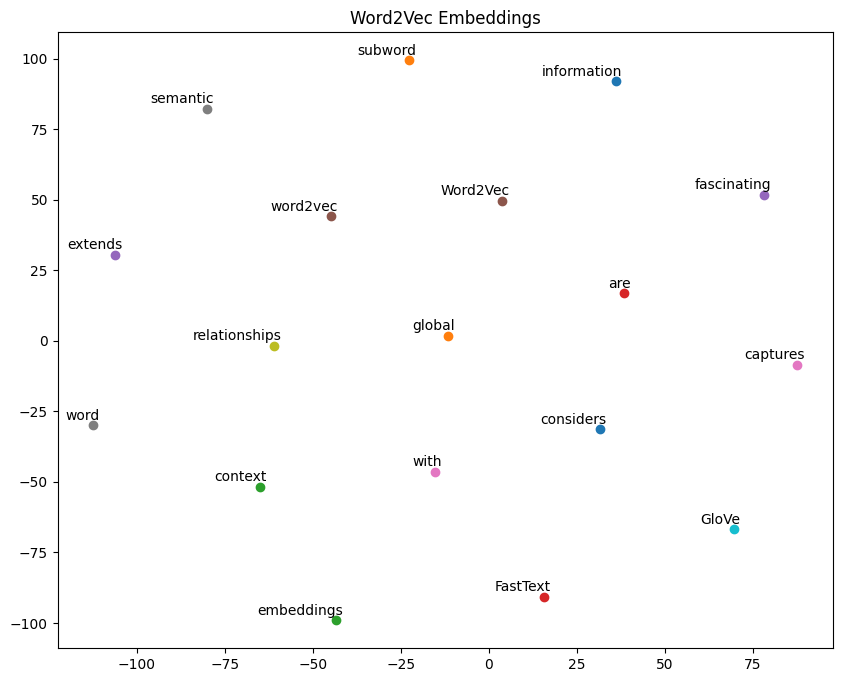

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


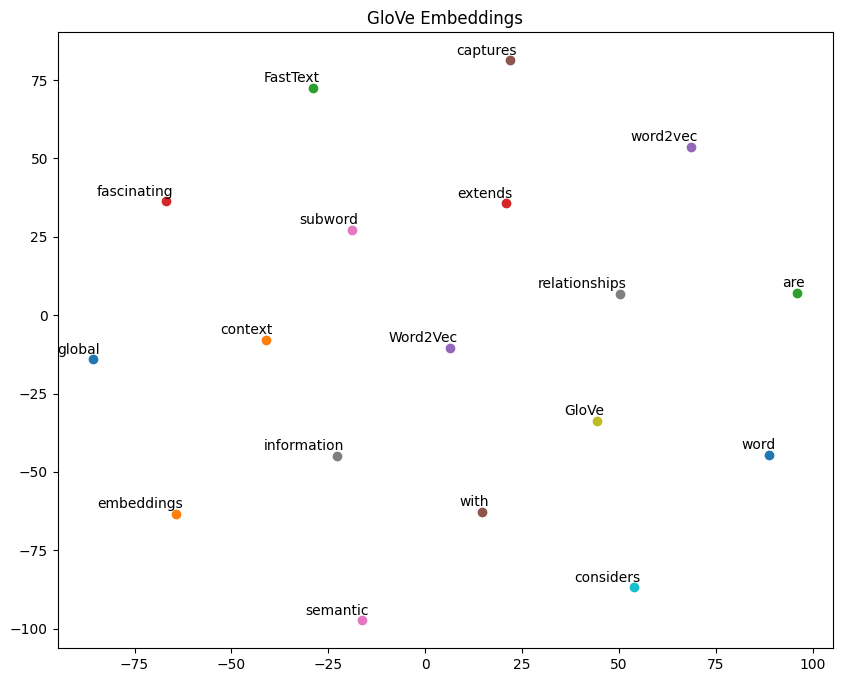

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


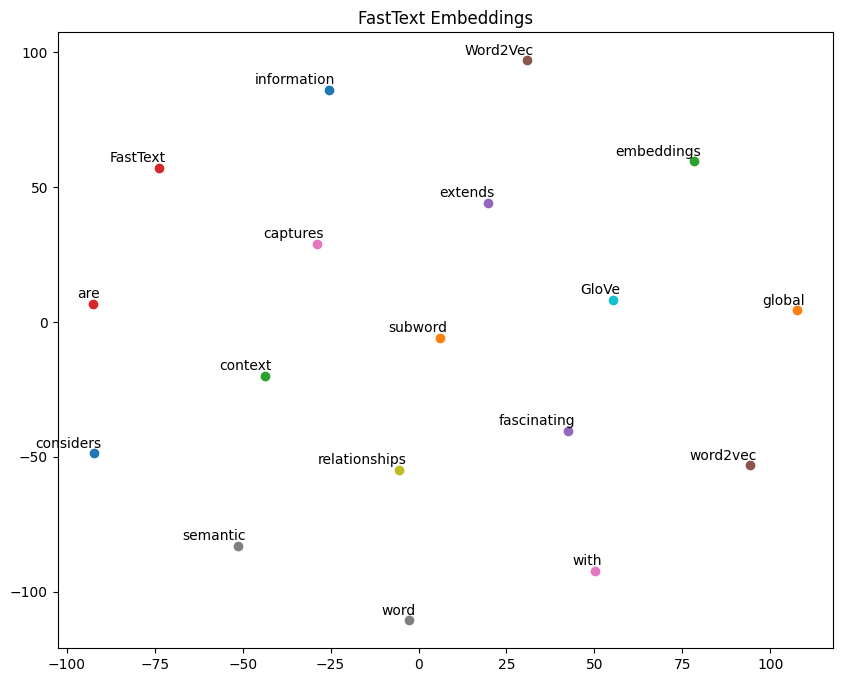

In [ ]:
# Import necessary libraries
from gensim.models import Word2Vec
from gensim.models import FastText
from glove import Corpus, Glove
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Toy dataset
toy_data = [
    "word embeddings are fascinating",
    "word2vec captures semantic relationships",
    "GloVe considers global context",
    "FastText extends Word2Vec with subword information"
]

# Function to train Word2Vec model
def train_word2vec(data):
    model = Word2Vec([sentence.split() for sentence in data], vector_size=100, window=5, min_count=1, workers=4)
    return model

# Function to train GloVe model
def train_glove(data):
    corpus = Corpus()
    tokenized_data = [sentence.split() for sentence in data]
    corpus.fit(tokenized_data, window=5)
    glove = Glove(no_components=100, learning_rate=0.05)
    glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
    # Add this line to assign the dictionary
    glove.dictionary = corpus.dictionary
    return glove

# Function to train FastText model
def train_fasttext(data):
    model = FastText(sentences=[sentence.split() for sentence in data], vector_size=100, window=5, min_count=1, workers=4)
    return model

# Function to plot embeddings
def plot_embeddings(model, title):
    if isinstance(model, Glove):  # Check if it's a GloVe model
        labels = list(model.dictionary.keys())
        vectors = [model.word_vectors[model.dictionary[word]] for word in labels]
    else:
        labels = model.wv.index_to_key
        vectors = [model.wv[word] for word in labels]

    vectors = np.array(vectors)  # Convert vectors to a NumPy array

    # Adjust perplexity to be less than the number of samples
    perplexity_value = min(40, vectors.shape[0] - 1)
    tsne_model = TSNE(perplexity=perplexity_value, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(vectors)

    x, y = [], []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(10, 8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title(title)
    plt.show()

# Train models
word2vec_model = train_word2vec(toy_data)
glove_model = train_glove(toy_data)
fasttext_model = train_fasttext(toy_data)

# Plot embeddings
plot_embeddings(word2vec_model, 'Word2Vec Embeddings')
plot_embeddings(glove_model, 'GloVe Embeddings')
plot_embeddings(fasttext_model, 'FastText Embeddings')

In [ ]:
# Import necessary libraries
from gensim.models import Word2Vec
from gensim.models import FastText
from glove import Corpus, Glove
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# ... (rest of the code remains the same) ...

# Function to plot embeddings
def plot_embeddings(model, title):
    if isinstance(model, Glove):  # Check if it's a GloVe model
        labels = list(model.dictionary.keys())
        vectors = [model.word_vectors[model.dictionary[word]] for word in labels]
    else:
        labels = model.wv.index_to_key
        vectors = [model.wv[word] for word in labels]

    vectors = np.array(vectors)  # Convert vectors to a NumPy array

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(vectors)

    # ... (rest of the plot_embeddings function remains the same) ...

# ... (rest of the code remains the same) ...